In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support

url='https://drive.google.com/file/d/1YE5Hlkt3pXsF3dCSmAQPrlpMqEodKFvC/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]

df = pd.read_csv(url)

Задание 1

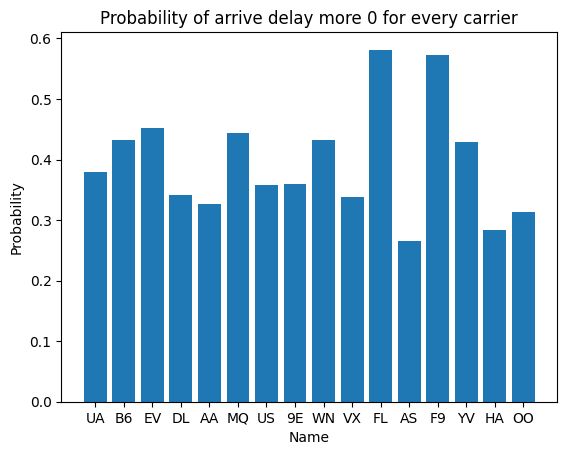

In [ ]:
df2 = df.loc[df['arr_delay'] > 0]

lst = df['carrier'].value_counts()
lst2 = df2['carrier'].value_counts()

series1 = pd.Series(lst, name='All')
series2 = pd.Series(lst2, name='Delay>0')

df3 = pd.concat([series1, series2], axis=1)
df3['probability'] = df3['Delay>0'] / df3['All']

plt.bar(df3.index, df3['probability'])
plt.xlabel('Name')
plt.ylabel('Probability')
plt.title('Probability of arrive delay more 0 for every carrier')
plt.show()

Задание 2

Летят в 'HNL' 'ANC'
Средние значения задержки отправления
13.146
11.437
9.329

['HNL' 'ANC']
Средние: 13.146569870766259
11.437851635757449
9.329593267882188


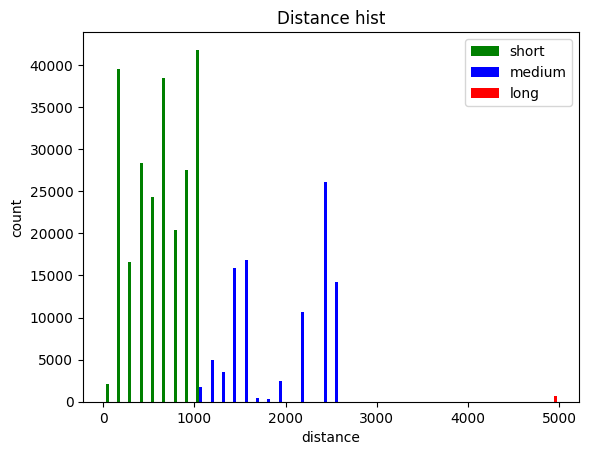

In [ ]:
x1 = list(df[df['distance'] < 1100]['distance'])
x2 = df[df['distance'] >= 1100]
x2 = list(x2[x2['distance'] < 3000]['distance'])
x3 = list(df[df['distance'] >= 3000]['distance'])

colors = ['green', 'blue', 'red']
names = ['short', 'medium', 'long']

plt.hist([x1, x2, x3], bins=40, color=colors, label=names)

plt.xlabel('distance')
plt.ylabel('count')
plt.legend()
plt.title('Distance hist')

dests = df[df['distance'] > 3000]['dest'].unique()
print(dests)

m1 = df[df['distance'] < 1100]['dep_delay'].mean()
m2 = df[df['distance'] >= 1100]
m2 = m2[m2['distance'] < 3000]['dep_delay'].mean()
m3 = df[df['distance'] >= 3000]['dep_delay'].mean()

print('Средние:', m1)
print(m2)
print(m3)
plt.show()

Задание 3 Результаты теста TtestResult(statistic=-1.3604552524350086, pvalue=0.17369180632509199, df=51953.0), pvaue = 0.174, то есть гипотеза верна


TtestResult(statistic=-1.3604552524350086, pvalue=0.17369180632509199, df=51953.0)


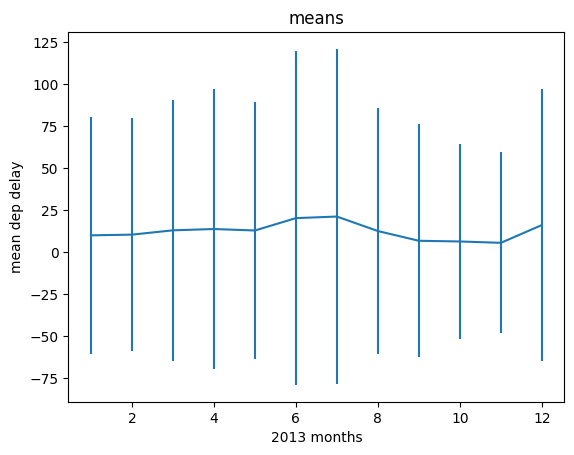

In [ ]:
df = df.fillna(0)

lst = np.full((336776, 1), 1)
df['day'] = lst
dp = pd.DataFrame({'year': df['year'], 'month': df['month'], 'day': df['day']})
df['date'] = pd.to_datetime(dp)

means = []
dovints = []
dates = sorted(df['date'].unique())
for i in dates:
    means.append(df[df['date'] == i]['dep_delay'].mean())
    dov = st.norm.interval(0.95, loc=df[df['date'] == i]['dep_delay'].mean(),
                           scale=np.std(df[df['date'] == i]['dep_delay']))
    dovints.append((dov[1] - dov[0]) / 2)

group1 = np.array(df[df['date'] == dates[0]]['dep_delay'])
group2 = np.array(df[df['date'] == dates[1]]['dep_delay'])

print(st.ttest_ind(a=group1, b=group2, equal_var=True))

plt.errorbar(np.arange(12) + 1, means, yerr=dovints)

plt.xlabel('2013 months')
plt.ylabel('mean dep delay')
plt.title('means')
plt.show()


Задание 4
Коэффицент a = 0, т.к. при дистанции 0 нужно 0 вемени

Корреляция:  0.990649647224859
a =  [0.13791948]
b =  0.0


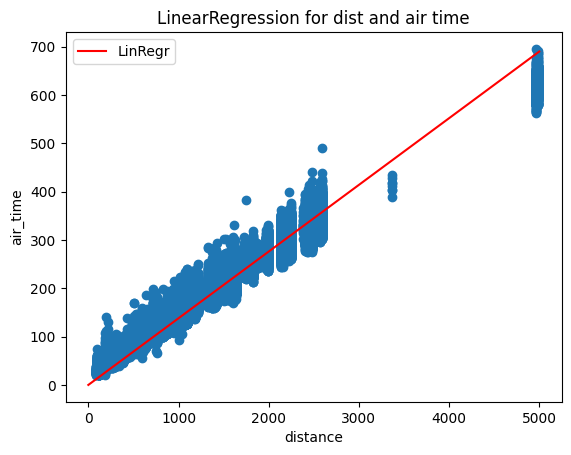

In [12]:
df = df.dropna()

print("Корреляция: ", df['distance'].corr(df['air_time']))

model = LinearRegression(fit_intercept=False)
model.fit(np.array(df['distance']).reshape(-1, 1), np.array(df['air_time']))
print("a = ", model.coef_)
print("b = ", model.intercept_)

plt.scatter(df['distance'], df['air_time'])
x = np.linspace(-1, 5000, 3)
plt.plot(x, x * model.coef_, label='LinRegr', color='red')
plt.legend()
plt.xlabel('distance')
plt.ylabel('air_time')
plt.title('LinearRegression for dist and air time')
plt.show()


Задание 5
lambda ~ 0, k ~ 3500

lambda ~ 0, k ~ 3500


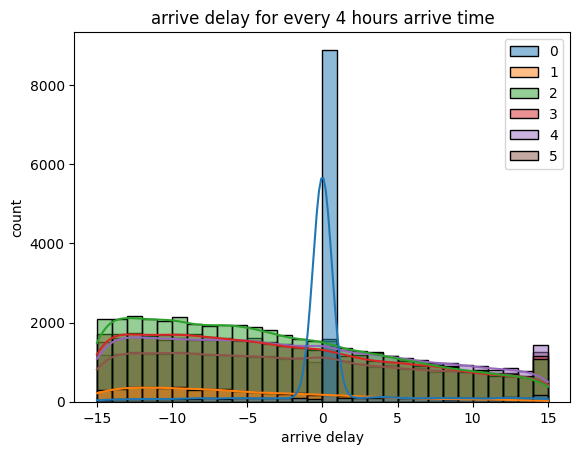

In [ ]:
df = df.fillna(0)

df = df[abs(df['arr_delay']) <= 15]
df['date'] = df['arr_time'] // 100 * 60 + df['arr_time'] % 100

lst = []
for i in range(0, 1440, 240):
    df3 = df[abs(df['date'] - i - 120) <= 120]['arr_delay']
    lst.append(np.array(df3))

sns.histplot(lst, kde=True, bins=30)
plt.xlabel('arrive delay')
plt.ylabel('count')
plt.title('arrive delay for every 4 hours arrive time')

print('lambda ~ 0, k ~ 3500')
plt.show()

Задание 6
Предсказание примера теста:  [0 1 1 ... 1 0 0] (1 - меньше 15, 0 > 15)
Точность:  0.5654903165675312
precision, recall, accuracy: 0.5662994443365872, 0.5651254487264117, 0.5639785918718396

In [ ]:
df1 = df[abs(df['arr_delay']) <= 15]
df0 = df[abs(df['arr_delay']) > 15]
lst1 = np.full((df1.shape[0], 1), 1)
df1['class'] = lst1
lst0 = np.full((df0.shape[0], 1), 0)
df0['class'] = lst0
dfr = pd.concat([df1, df0])

x_selected = dfr.iloc[:, [5, 12, 13]]

y_selected = dfr.iloc[:, 14]

X_train, X_test, y_train, y_test = train_test_split(x_selected,
                                                    y_selected,
                                                    train_size=0.7,
                                                    random_state=42)
lr_params = {'C':            1,
             'class_weight': None,
             'max_iter':     4000,
             'solver':       'newton-cg',
             'tol':          0.00001}

lr = LogisticRegression(**lr_params)

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print("Предсказание примера теста: ", y_pred)

score = cross_val_score(lr, x_selected, y_selected, cv=5)
print("Точность: ", score.mean())

print(precision_recall_fscore_support(y_test, y_pred, average='macro'))

<ipython-input-2-9a571b72c314>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['class'] = lst1
<ipython-input-2-9a571b72c314>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['class'] = lst0
/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed


Предсказание примера теста:  [0 1 1 ... 1 0 0]


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


Точность:  0.5654903165675312
(0.5662994443365872, 0.5651254487264117, 0.5639785918718396, None)
